In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

from collections import Counter

# nltk.download("punkt")
# nltk.download('stopwords')

In [2]:
df = pd.read_csv("AI_Human.csv")
df.shape

(487235, 2)

In [3]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [25]:
word_counter = Counter()

ai_counter = Counter()
human_counter = Counter()

In [26]:
for index, row in df.iterrows():
    words = word_tokenize(row["text"].lower())
    word_counter.update(words)

    if row["generated"] == 0:
        human_counter.update(words)
    else:
        ai_counter.update(words)



In [29]:
counters = {
    "word_counter": word_counter,
    "human_counter": human_counter,
    "ai_counter": ai_counter 
}

In [28]:
# import pickle

# with open("counters.pkl", "wb") as f:
#     pickle.dump(counters, f)

# with open('counters.pkl', 'rb') as f:
#     loaded_counters = pickle.load(f)

# # Accessing the counters
# wc = loaded_counters['word_counter']
# hc = loaded_counters['human_counter']
# ac = loaded_counters['ai_counter']

In [47]:
stop_words = set(stopwords.words("english"))
punctuations = set(string.punctuation)

In [49]:
wc = Counter({word: count for word, count in wc.items() if word not in stop_words})
wc = Counter({word: count for word, count in wc.items() if word not in punctuations})


hc = Counter({word: count for word, count in hc.items() if word not in stop_words})
hc = Counter({word: count for word, count in hc.items() if word not in punctuations})


ac = Counter({word: count for word, count in ac.items() if word not in stop_words})
ac = Counter({word: count for word, count in ac.items() if word not in punctuations})

In [50]:
wc

Counter({'students': 1198346,
         'people': 1150885,
         'would': 1024991,
         "'s": 955029,
         "n't": 759096,
         'school': 683750,
         'also': 643000,
         "''": 620781,
         'like': 616276,
         'car': 608624,
         'cars': 593094,
         'could': 593062,
         'electoral': 566836,
         'help': 560644,
         'one': 555066,
         'time': 540795,
         '``': 516574,
         'college': 505721,
         'get': 501237,
         'make': 498606,
         'many': 465504,
         'may': 403525,
         'think': 395213,
         'vote': 381549,
         'states': 377834,
         'work': 376355,
         'student': 366886,
         'even': 356906,
         'life': 350766,
         'way': 350520,
         'venus': 333976,
         'good': 315988,
         'better': 310376,
         'new': 306418,
         'use': 305155,
         'take': 298174,
         'know': 296386,
         'need': 295399,
         'driving': 293699,
      

In [52]:
ac.most_common(20)

[("'s", 381327),
 ('students', 344036),
 ('people', 271165),
 ('also', 239022),
 ('electoral', 220153),
 ('college', 202464),
 ('like', 202406),
 ('may', 191319),
 ('help', 190146),
 ('one', 161794),
 ('make', 160426),
 ('important', 160316),
 ('time', 159599),
 ('car', 154337),
 ('states', 151290),
 ('school', 147030),
 ('would', 140859),
 ('cars', 139145),
 ('could', 133383),
 ('life', 132263)]

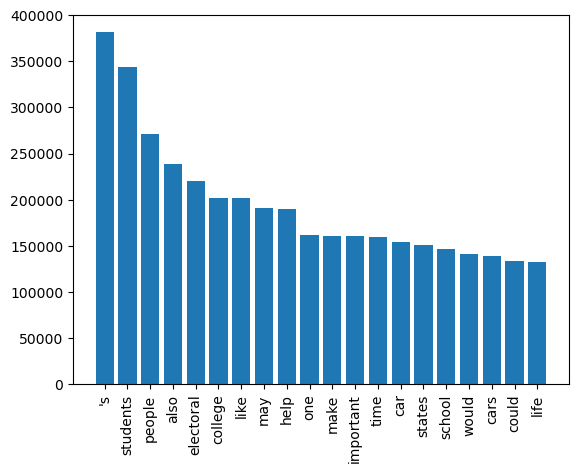

In [61]:

plt.bar(wa, ca)
plt.xticks(rotation = 90)
plt.show()

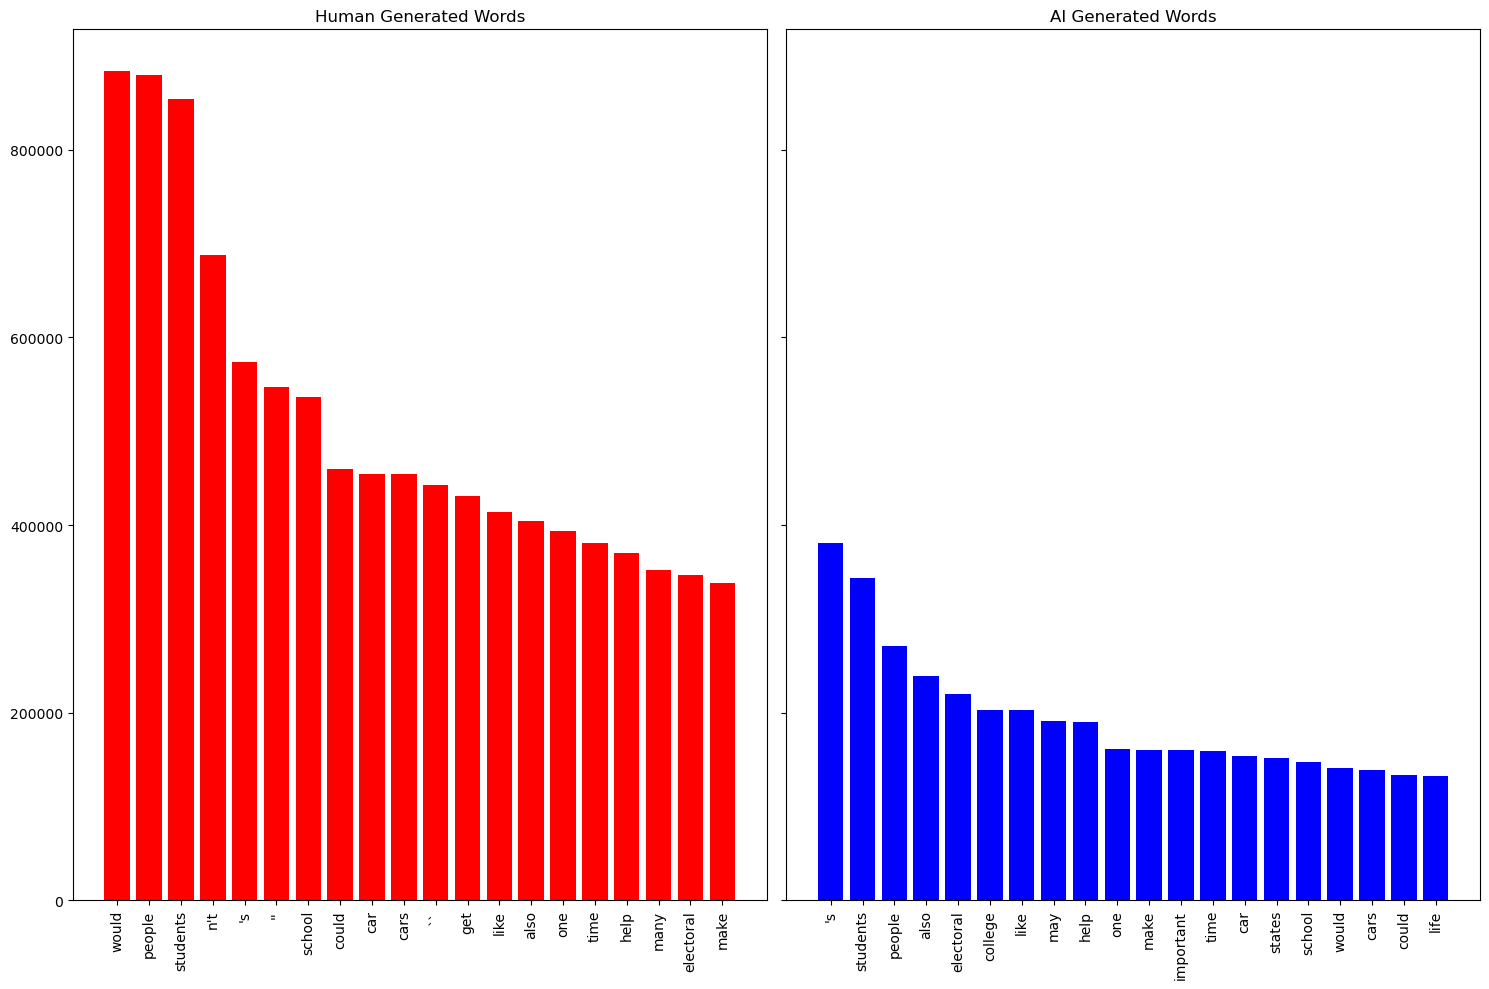

In [69]:
wh, ch = zip(*hc.most_common(20))
wa, ca = zip(*ac.most_common(20))


fig, axs = plt.subplots(1,2, figsize=(15,10), sharey=True)

axs[0].bar(wh, ch, color="r")
axs[0].tick_params(axis="x", rotation=90)
axs[0].set_title("Human Generated Words")

axs[1].bar(wa, ca, color="b")
axs[1].tick_params(axis="x", rotation=90)
axs[1].set_title("AI Generated Words")


plt.tight_layout()
plt.show()
